## CS6650 Homework 2 (Holi 2023 Semester)

---
Name: `Siddhanth Ramani`

Roll No: `CS23Z007`

Email: `CS23Z007@smail.iitm.ac.in`

---

### Preliminary Analysis of PPG Sensor Signals
Refer to the PPG sensor logs shared in the class lecture wiki. Your task is to perform some preliminary analysis on the same dataset. It consists of three columns, a UNIX epoch timestamp in milliseconds, photodiode responses (digitized) for the IR led and the Red led, respectively. For the rest of the document, we will refer to these digital signals as IR and RED. 

Create a directory, `<Your_Roll>_CS6650H23`. Place this notebook and the dataset file in that directory. Now you will perform the following tasks:

1. [Visualize the data (5 points)](#task1)
2. [Peak detection (15 points)](#task2)
3. [Frequency domain analysis (32 points)](#task3)
4. [Spectrograms (20 points)](#task4)
5. [Quantization of sensor data (28 points)](#task5)

Please keep in mind,

- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required this time. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not directly address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $2^{nd}$, April, 2023**

#### Submission Instructions
- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.

### Imports

In [2]:
# All imports required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from scipy.fft import rfft, rfftfreq

### Task 1: Visualize the data [5 points] <a id='task1'></a>
Read the dataset into memory.
1. Plot the IR and RED signals in the time domain - approx length of samples ~32.14 seconds.
2. What is the sample rate at which the data has been collected? Is it uniform? If not, what is the standard deviation?

In [3]:
# Reading the dataset
df = pd.read_csv("./sample_ppg_log_ayon.csv", delimiter = "          ", header = None)
df.columns = ["epoch_ms", "ir_intensity", "red_intensity"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   epoch_ms       514 non-null    int64
 1   ir_intensity   514 non-null    int64
 2   red_intensity  514 non-null    int64
dtypes: int64(3)
memory usage: 12.2 KB


C:\Users\siddh\AppData\Local\Temp\ipykernel_16444\4277934221.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("./sample_ppg_log_ayon.csv", delimiter = "          ", header = None)


In [4]:
df["epoch_ms"] = df["epoch_ms"] - df["epoch_ms"].min()

In [5]:
df

,epoch_ms,ir_intensity,red_intensity
0,0,51538,8969
1,63,51611,9186
2,125,51680,9406
3,190,51738,9600
4,253,51788,9748
...,...,...,...
509,31901,52391,10479
510,31953,52301,10216
511,32020,52267,10150
512,32075,52259,10129


In [6]:
df.describe()

,epoch_ms,ir_intensity,red_intensity
count,514.000000,514.000000,514.000000
mean,16079.237354,51925.608949,9171.311284
std,9312.657953,275.934515,542.143720
min,0.000000,51375.000000,8025.000000
25%,8017.750000,51699.750000,8785.000000
50%,16098.000000,51974.000000,9131.000000
75%,24123.750000,52144.250000,9533.250000
max,32139.000000,52472.000000,10659.000000


Text(0, 0.5, 'Intensity')

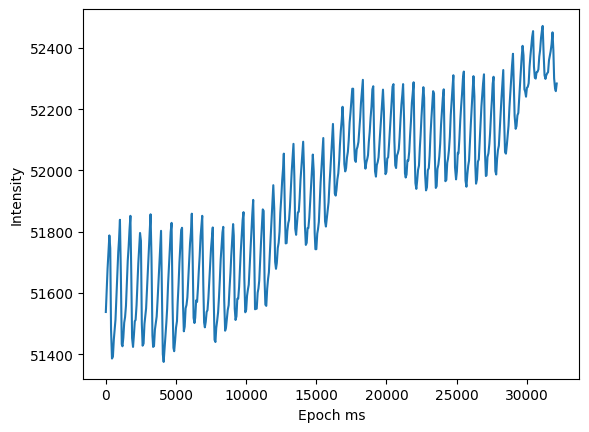

In [7]:
# Plotting IR signals
plt.plot(df["epoch_ms"], df["ir_intensity"])
plt.xlabel("Epoch ms")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

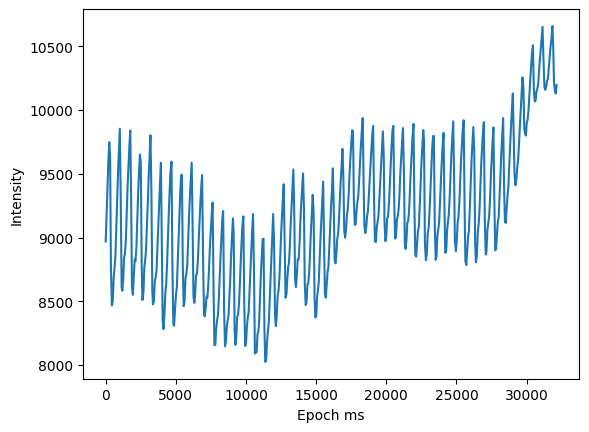

In [8]:
# Plotting red signals
plt.plot(df["epoch_ms"], df["red_intensity"])
plt.xlabel("Epoch ms")
plt.ylabel("Intensity")

Text(0, 0.5, 'Epoch sample rate')

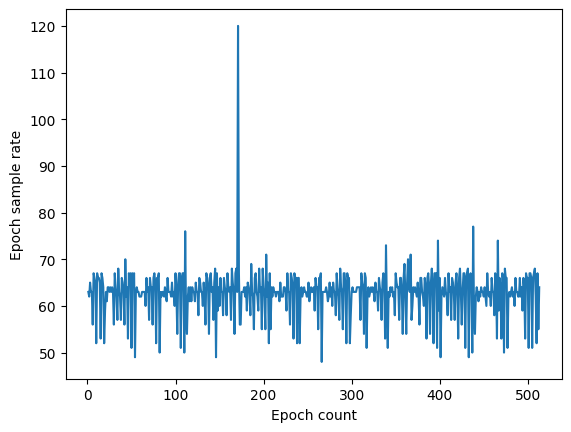

In [9]:
# Checking if sample rate is constant - it is not
plt.plot(df["epoch_ms"].diff())
plt.xlabel("Epoch count")
plt.ylabel("Epoch sample rate")

In [10]:
# Standard deviation of sample rate
df["epoch_ms"].diff().std()

5.208324561396122

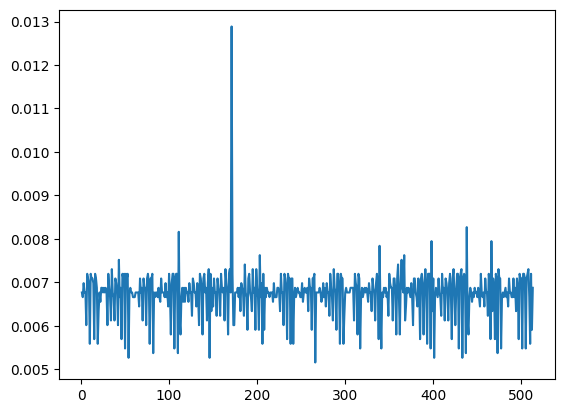

In [11]:
df["stdized_epoch_ms"] = (df["epoch_ms"] - df["epoch_ms"].mean())/df["epoch_ms"].std()
plt.plot(df["stdized_epoch_ms"].diff())

In [12]:
df["stdized_epoch_ms"].diff().std()

0.0005592736883262338

### Task 2: Peak detection [5 + 10 = 15 points] <a id='task2'></a>
Your task is to detect peaks in the time domain data using the `scipy.signal.find_peaks` method on both IR and RED signals.
1. Plot the peak locations for the signals. Do the peak indices between the two signals match?
2. Calculate the BPM using a sliding window of size 4 seconds. Plot BPM versus time.

In [13]:
# Finding the peaks
ir_peaks = scipy.signal.find_peaks(df["ir_intensity"])
red_peaks = scipy.signal.find_peaks(df["red_intensity"])


In [14]:
len(ir_peaks[0])

48

In [15]:
indices = [1 if i in ir_peaks[0] else 0 for i in range(len(df))]

In [16]:
len(indices)

514

In [17]:
len(df)

514

In [18]:
df[np.array(indices, dtype=bool)]

,epoch_ms,ir_intensity,red_intensity,stdized_epoch_ms
4,253,51788,9748,-1.699433
16,1006,51839,9853,-1.618575
28,1753,51852,9839,-1.538362
39,2438,51796,9651,-1.464806
51,3189,51857,9802,-1.384163
63,3936,51803,9586,-1.303950
75,4688,51829,9595,-1.223199
87,5434,51813,9493,-1.143093
98,6128,51859,9587,-1.068571
103,6437,51576,8706,-1.035390


Text(0, 0.5, 'Peak index')

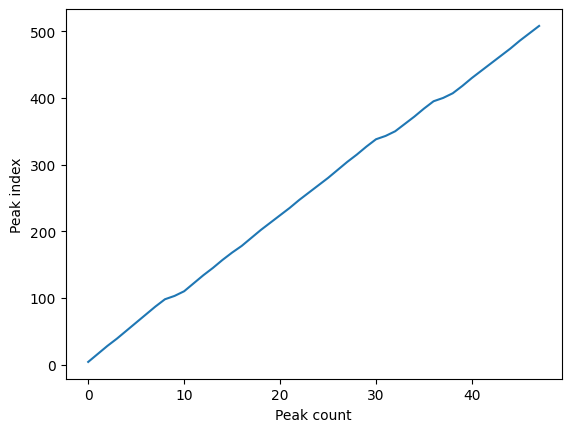

In [19]:
# Plotting IR peaks
plt.plot(ir_peaks[0])
plt.xlabel("Peak count")
plt.ylabel("Peak index")

Text(0, 0.5, 'Peak index')

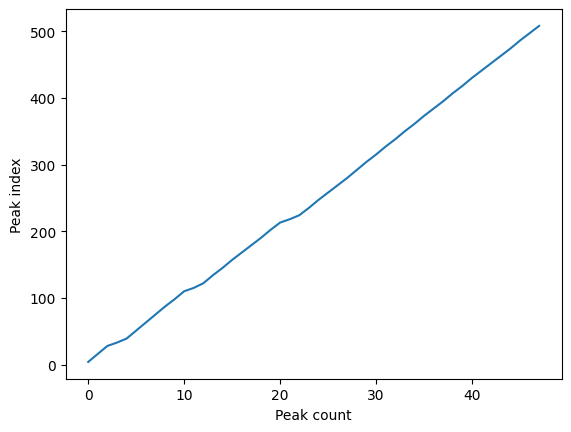

In [20]:
# # Plotting IR peaks
plt.plot(red_peaks[0])
plt.xlabel("Peak count")
plt.ylabel("Peak index")

Text(0, 0.5, 'Peak indexes of ir')

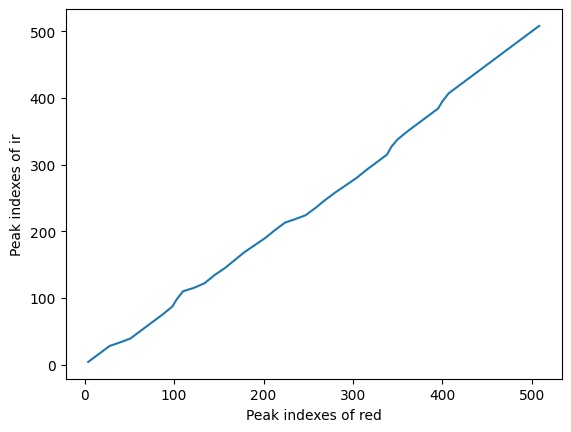

In [21]:
plt.plot(ir_peaks[0], red_peaks[0])
plt.xlabel("Peak indexes of red")
plt.ylabel("Peak indexes of ir")

In [22]:
# Correlation between peaks of IR and peaks of Red
scipy.stats.pearsonr(ir_peaks[0], red_peaks[0])[0]

0.9985630601885596

In [23]:
# Do peak indices match? - ie, are the peaking at the same time
set_ir_peaks = set(ir_peaks[0])
set_red_peaks = set(red_peaks[0])

print("Percent of peaks matching", (1 - 
                                    (len(set_ir_peaks - set_red_peaks) + len(set_red_peaks - set_ir_peaks))
                                    / len(set_ir_peaks.union(set_red_peaks)))
                                    * 100
                                    )

Percent of peaks matching 81.13207547169812


In [24]:
def get_bpm(yf, sample_rate):
    yf = np.abs(yf)
    yf = yf - yf.mean()
    """
    This function returns the frequency with maximum amplitude when given the frequency data.
    """
    # Computing the index of the maximum frequency
    # and then doing a linear interpolation to get the actual frequency value
    
    return (np.argmax(yf[1:int(len(yf)/2)]) + 1) * (sample_rate/len(yf)) * 60

In [25]:
median_sample_rate = 1000/df["epoch_ms"].diff().median()
print(median_sample_rate)
index_4s_later = int(4000/median_sample_rate)
print(index_4s_later)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

15.873015873015873
252


In [29]:
list_ir_bpm = []
list_red_bpm = []

last_count = 0

for index, row in df.iterrows():
    index_4s_later_approx = df["epoch_ms"][index] + 4000
    index_4s_later = find_nearest(df["epoch_ms"], index_4s_later_approx)

    if index_4s_later == len(df) - 1:
        if last_count == 0:
            last_count = 1
        else:
            break
    
    sample_rate = 1000/df["epoch_ms"][index:index_4s_later].diff().mean()
    freq_transform = np.fft.fft(df["ir_intensity"][index:index_4s_later])
    bpm = get_bpm(freq_transform, sample_rate)
    if bpm > 40:
        list_ir_bpm.append(bpm)
    # plt.plot(list(range(1, len(freq_transform))), np.abs(freq_transform)[1:])
    freq_transform = np.fft.fft(df["red_intensity"][index:index_4s_later])
    bpm = get_bpm(freq_transform, sample_rate)
    if bpm > 40:
        list_red_bpm.append(bpm)

Text(0, 0.5, 'BPM')

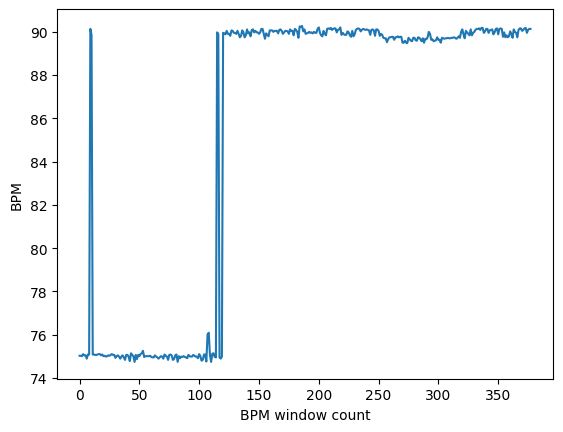

In [32]:
plt.plot(list_ir_bpm)
plt.xlabel("BPM window count")
plt.ylabel("BPM")

Text(0, 0.5, 'BPM')

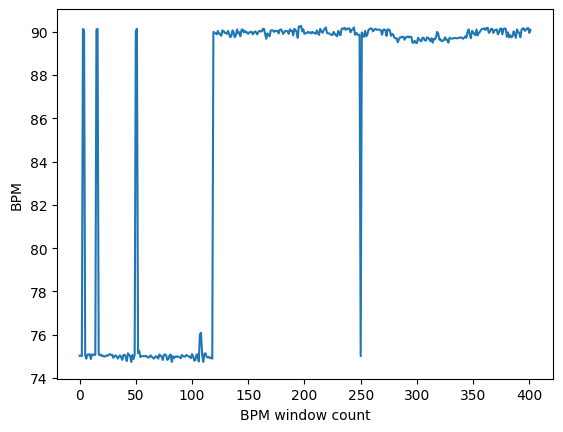

In [33]:
plt.plot(list_red_bpm)
plt.xlabel("BPM window count")
plt.ylabel("BPM")

##### Observations Task 2

Edit this section to put your observations.

<div class="alert alert-block alert-warning">
<b>Note:</b> For Tasks 3, 4 and 5 use only the RED channel data (no need to use IR data).
</div>

### Task 3: Frequency domain analysis [2 + 20 + 10 = 32 points] <a id='task3'></a>
1. What is the maximum frequency value that can be tracked in the provided signals?
2. Implement a function realizing the **coiling machine analogy** as discussed in class with detailed comments.
3. Run the coiling machine for `N = 32`, `64`, `128`, `256`, and `512` samples. Report the BPM values obtained in these five settings in a table. Validate the output with the library function `numpy.fft.fft`. Show the heatmaps as a 2x5 *subplot*. Label them properly. The top row corresponds to your function, while the bottom row corresponds to the numpy FFT implementation.

In [35]:
# --- your code here ---
def frequency_coiler(time_seq, freq, number_of_samples):
    dict_angle_components = {}
    for index, time in enumerate(time_seq):
        angle = ((2*math.pi*freq) * index)/ number_of_samples
        if dict_angle_components.get(angle, -1) != -1:
            dict_angle_components[angle] += time
        else:
            dict_angle_components[angle] = time

    x_component = 0
    y_component = 0
    for angle, mass in dict_angle_components.items():
        x_component += mass * math.cos(angle)
        y_component += mass * math.sin(angle)
    return math.sqrt(math.pow(x_component, 2) + math.pow(y_component, 2)), math.atan2(y_component, x_component)

def get_fft(time_sequence, only_positive=0):
    N = len(time_sequence)
    if only_positive:
        number_of_components = int(N/2)
    else:
        number_of_components = N

    frequency_sequence = {"magnitude" : [], "phase" : []}
    for frequency in range(number_of_components):
        mag, phase = frequency_coiler(time_sequence, frequency, N)
        frequency_sequence["magnitude"].append(mag)
        frequency_sequence["phase"].append(phase)

    return frequency_sequence

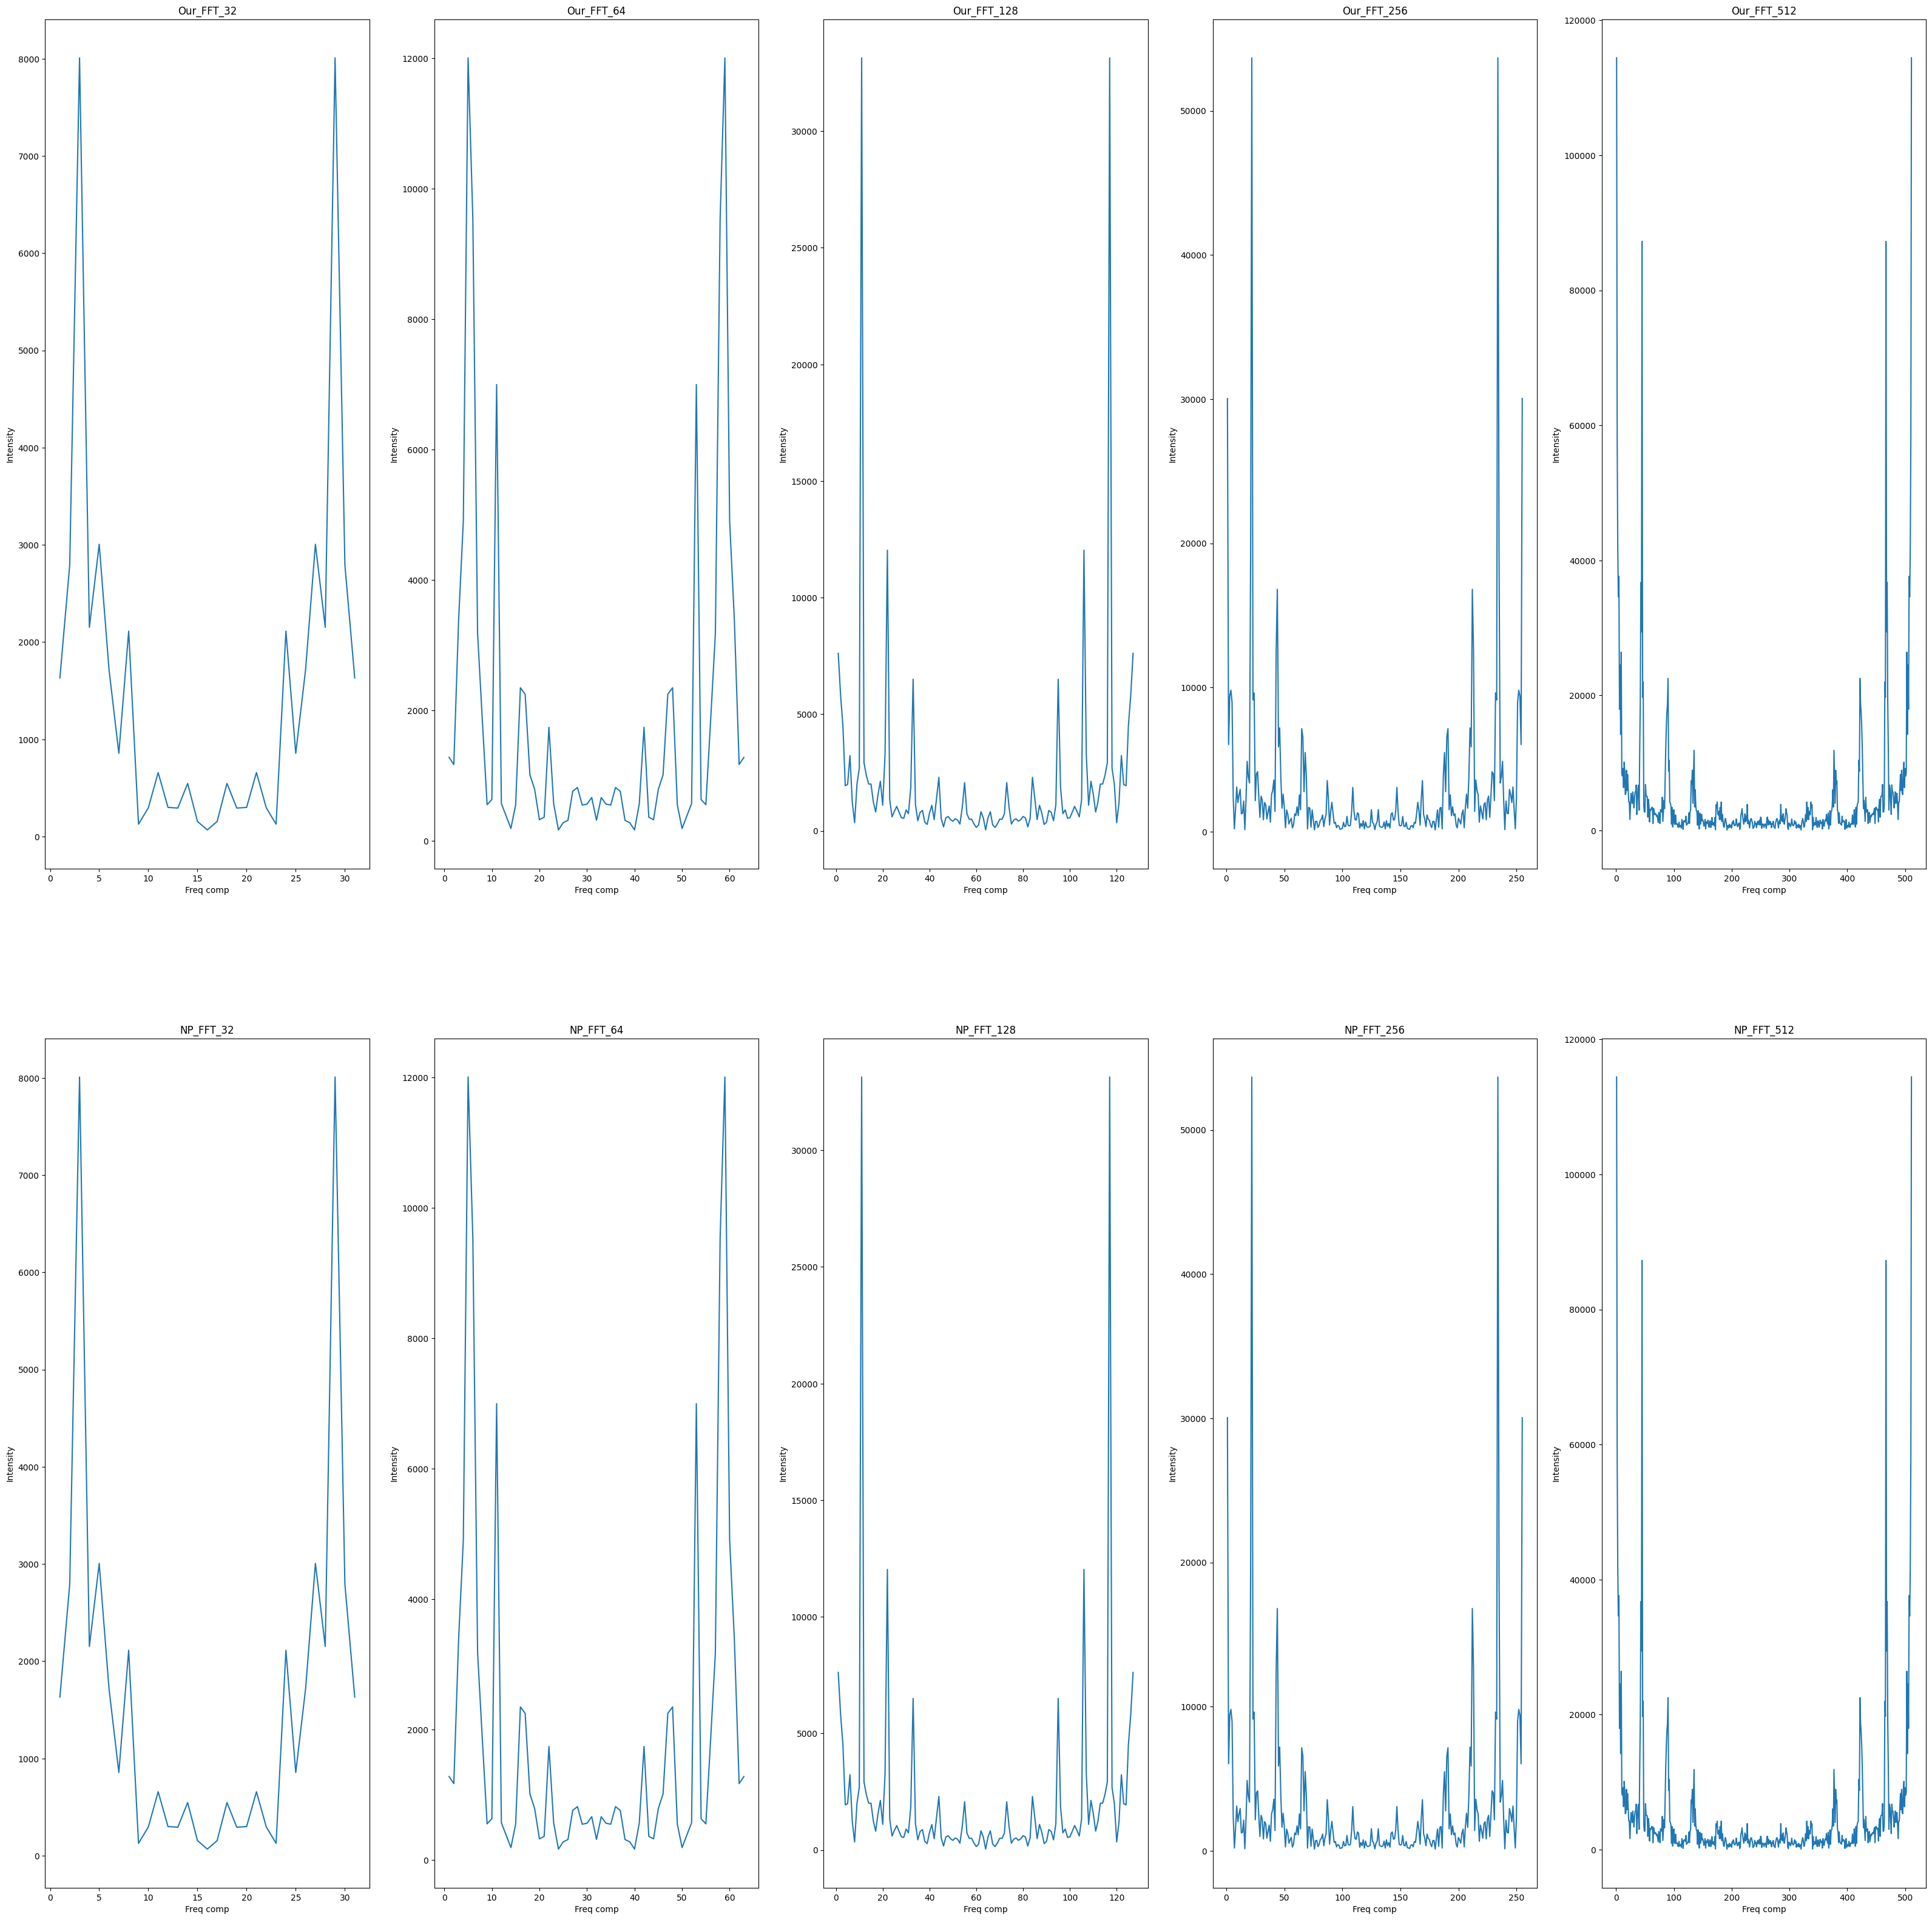

In [36]:
fig, ax = plt.subplots(2, 5, figsize=(40, 40))
list_n = [32, 64, 128, 256, 512]
for index, N in enumerate(list_n):
    self_fft = get_fft(df["red_intensity"][0:N])
    np_fft = np.fft.fft(df["red_intensity"][0:N])
    ax[0, index].plot(list(range(1, len(self_fft["magnitude"]))), self_fft["magnitude"][1:])
    ax[0, index].title.set_text("Our_FFT_{}".format(N))
    ax[1, index].plot(list(range(1, len(np_fft))), np.abs(np_fft)[1:])
    ax[1, index].title.set_text("NP_FFT_{}".format(N))

    ax[0, index].set_xlabel("Freq comp")
    ax[0, index].set_ylabel("Intensity")
    ax[1, index].set_xlabel("Freq comp")
    ax[1, index].set_ylabel("Intensity")





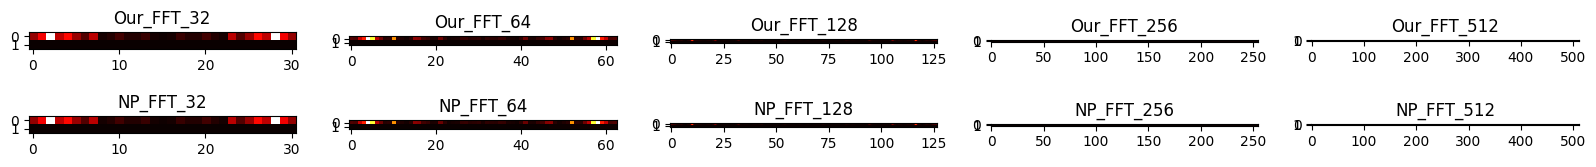

In [37]:
fig, ax = plt.subplots(2, 5, figsize=(20,2))
# , gridspec_kw={"height_ratios" : [20, 2]}
list_n = [32, 64, 128, 256, 512]
for index, N in enumerate(list_n):
    self_fft = get_fft(df["red_intensity"][0:N])
    np_fft = np.fft.fft(df["red_intensity"][0:N])
    ax[0, index].title.set_text("Our_FFT_{}".format(N))
    ax[1, index].title.set_text("NP_FFT_{}".format(N))
    ax[0, index].imshow((self_fft["magnitude"][1:], list(range(1, len(self_fft["magnitude"])))), cmap = "hot")
    ax[1, index].imshow((np.abs(np_fft)[1:], list(range(1, len(np_fft)))), cmap = "hot")

##### Observations Task 3

Edit this section to put your observations.

| N         | BPM   |
| --------  | ------|
| 32        |       |
| 64        |       |
| 128       |       |
| 256       |       |
| 512       |       |

### Task 4: Spectrograms [10 + 10 = 20 points] <a id='task4'></a>
1. Plot the time-frequency spectrogram of the above data using your coiling machine function, taking a moving average window of size 2, 8, and 16 seconds. Show the heatmaps as a 1x3 *subplot*. Label them properly.
2. Add gaussian noise to the samples with a mean of 200 and a standard deviation of 50. Run the above analysis (4.1) again. Validate any improvement brought in by the 16 second window over the 2 or 8 second ones.

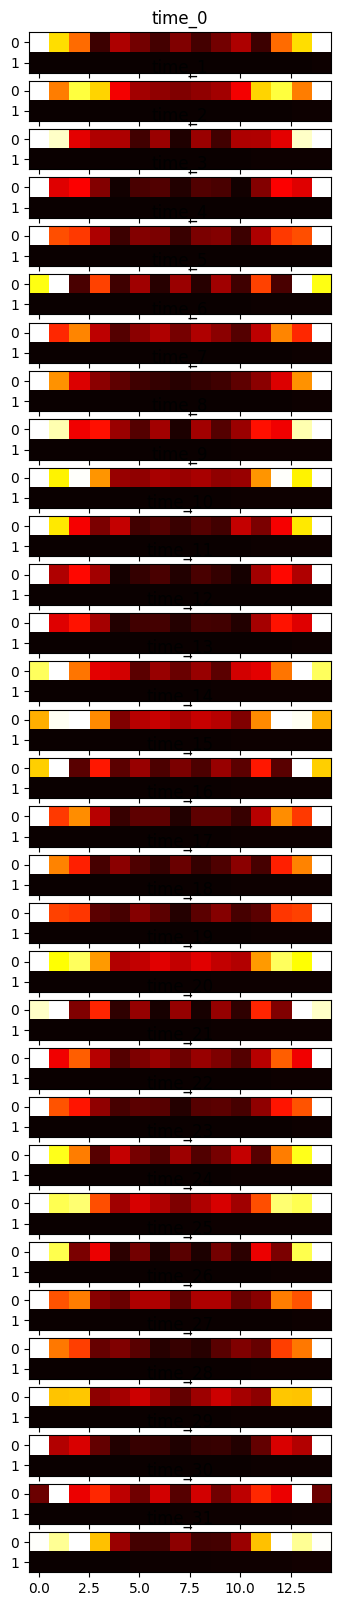

In [38]:
# --- your code here ---
list_window_size = [16]
 
for window_size in list_window_size:
    fig, ax = plt.subplots(int(len(df["red_intensity"])/window_size), 1, figsize=(20, 20))
    for iter in range(int(len(df["red_intensity"])/window_size)):
        iter_end = min((iter + 1)*window_size, len(df["red_intensity"]))
        self_fft = get_fft(df["red_intensity"][iter*window_size:iter_end])
        ax[iter].plot(list(range(1, len(self_fft["magnitude"]))), self_fft["magnitude"][1:])
        ax[iter].title.set_text("time_{}".format(iter))
        ax[iter].imshow((self_fft["magnitude"][1:], list(range(1, len(self_fft["magnitude"])))), cmap = "hot")

In [39]:
import cv2

(32, 15)


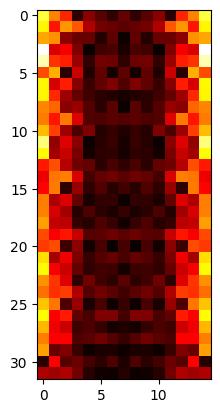

In [67]:
# --- your code here ---
list_window_size = [16]
for window_size in list_window_size:
    for iter in range(int(len(df["red_intensity"])/window_size)):
        iter_end = min((iter + 1)*window_size, len(df["red_intensity"]))
        self_fft = get_fft(df["red_intensity"][iter*window_size:iter_end])
        
        if len(self_fft["magnitude"]) != window_size:
            continue
        if iter == 0:
            heat_array = np.array(self_fft["magnitude"][1:]).reshape(1, -1)
        else:
            heat_array = np.concatenate((heat_array, np.array(self_fft["magnitude"][1:]).reshape(1, -1)), axis=0)

print(heat_array.shape)
plt.imshow(heat_array, cmap = "hot")

##### Observations Task 4

Edit this section to put your observations.

### Task 5: Quantization of sensor data [5 + 15 + 8 = 28 points] <a id='task5'></a>
Assume that a 16-bit ADC was used in the sensor that maps the range 0 to 5 volts.
1. How many bits would have sufficed at the minimum without losing the accuracy of the signal?
2. Now start lowering the number of bits (of course virtually), one at a time, up to a minimum of 2 bits, and represent the data with the relevant number of bits. Plot detected BPM versus the number of ADC bits. To detect BPM, directly use a 512-bin FFT on all the samples.
3. Does the plot in 5.2 change if we consider the noisy samples as produced in 4.2?

In [6]:
# --- your code here ---

##### Observations Task 5

Edit this section to put your observations.